In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [97]:
url =("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")
df_car = pd.read_csv(url)

In [98]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [99]:
# printing selective columns
df_car.loc[0:5,['CarName','fueltype','enginesize','horsepower','price']]

,CarName,fueltype,enginesize,horsepower,price
0,alfa-romero giulia,gas,130,111,13495.0
1,alfa-romero stelvio,gas,130,111,16500.0
2,alfa-romero Quadrifoglio,gas,152,154,16500.0
3,audi 100 ls,gas,109,102,13950.0
4,audi 100ls,gas,136,115,17450.0
5,audi fox,gas,136,110,15250.0


In [100]:
#Befor going to train the modal first checks relationship between independent and dependent variables
import plotly.express as px

fig = px.scatter(df_car, x='horsepower', y='price', trendline = 'ols',title='horsepower vs. Price')

# show the plot
fig.show()

In [101]:
df_car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [102]:
#Converting categorical value into discrete numeric value.

mapping = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

df_car['cylindernumber'] = df_car['cylindernumber'].replace(mapping)

In [103]:
# Now check the above operations

df_car['cylindernumber'].head()

# Converted Successfully

0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64

In [104]:
# Function to remove outliers from a given column
def remove_outlier(df, col_name):
    z_scores = np.abs((df[col_name] - df[col_name].mean()) / df[col_name].std())
    
    # define a threshold for identifying outliers
    threshold = 3
    
    # remove the outliers from the column
    df = df[z_scores < threshold]
    
    return df



# List of column names to remove outliers from
columns_to_clean = ['carlength', 'carwidth']

# Loop through each column and remove outliers
for col in columns_to_clean:
    df_car = remove_outlier(df_car, col)

In [105]:
# -----> Side by Side Scatter plot using plotly <------

import plotly.graph_objs as go
from plotly.subplots import make_subplots

# create a list of the columns to plot on the x-axis
x_cols = ['curbweight', 'carlength', 'carwidth', 'horsepower']

# create a list of the row and column indices for each subplot
indices = [(1, 1), (1, 2), (2, 1), (2, 2)]

# create a new figure with subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=['Curbweight vs. Price', 'Car Length vs. Price', 'Car Width vs. Price', 'Horsepower vs. Price'])

# loop through each subplot and plot the scatter plot with a trendline
for i, (r, c) in enumerate(indices):
    x = df_car[x_cols[i]]
    y = df_car['price']
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers'), row=r, col=c)
    

    
    fig.update_xaxes(title_text=x_cols[i], row=r, col=c)
    fig.update_yaxes(title_text='Price', row=r, col=c)

# update the layout of the figure
fig.update_layout(title='Scatter Plots of Independent Variables vs. Price', height=600, width=800)

# show the figure
fig.show()

In [106]:
from sklearn.model_selection import train_test_split

# dataframe with independent variables
X = df_car[['horsepower', 'carlength', 'carwidth', 'curbweight']]

# dataframe with dependent variable
y = df_car['price']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression

# Creating a LinearRegression object
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the prices for test data
y_pred = model.predict(X_test)

Mean squared error:  18335844.669
R-squared value:  0.77


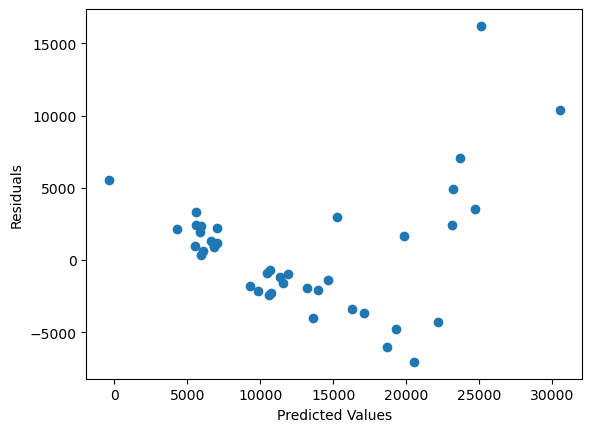

In [108]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared value of the model
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error: ", round(mse,3))
print("R-squared value: ",round(r2,2))

# Calculate the residual error
residuals = y_test - y_pred

# Plot the residual error
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()